In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2015.csv')
df.isnull().sum()
df.dropna(inplace = True)
duplicate = df[df.duplicated()]
df['Diabetes_012'] = df['Diabetes_012'].astype('int')
df['HighBP'] = df['HighBP'].astype('int')
df['HighChol'] = df['HighChol'].astype('int')
df['CholCheck'] = df['CholCheck'].astype('int')
df['BMI'] = df['BMI'].astype('int')
df['Smoker'] = df['Smoker'].astype('int')
df['Stroke'] = df['Stroke'].astype('int')
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].astype('int')
df['PhysActivity'] = df['PhysActivity'].astype('int')
df['Fruits'] = df['Fruits'].astype('int')
df['Veggies'] = df['Veggies'].astype('int')
df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].astype('int')
df['AnyHealthcare'] = df['AnyHealthcare'].astype('int')
df['NoDocbcCost'] = df['NoDocbcCost'].astype('int')
df['GenHlth'] = df['GenHlth'].astype('int')
df['MentHlth'] = df['MentHlth'].astype('int')
df['PhysHlth'] = df['PhysHlth'].astype('int')
df['DiffWalk'] = df['DiffWalk'].astype('int')
df['Sex'] = df['Sex'].astype('int')
df['Age'] = df['Age'].astype('int')
df['Education'] = df['Education'].astype('int')
df['Income'] = df['Income'].astype('int')

X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']


In [3]:
def confusion_matrix_plot(cfm,flxt,title):
    sns.set(rc = {'figure.figsize':(5,5)})
    ax = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='g')
    ax.set_title(f"Confusion Matrix for {title}\n\n")
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    ax.xaxis.set_ticklabels(['True','False'])
    ax.yaxis.set_ticklabels(['True','False'])
    return plt.show()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0, 0.5, 'Diabetes_012'),
  Text(0, 1.5, 'HighBP'),
  Text(0, 2.5, 'HighChol'),
  Text(0, 3.5, 'CholCheck'),
  Text(0, 4.5, 'BMI'),
  Text(0, 5.5, 'Smoker'),
  Text(0, 6.5, 'Stroke'),
  Text(0, 7.5, 'HeartDiseaseorAttack'),
  Text(0, 8.5, 'PhysActivity'),
  Text(0, 9.5, 'Fruits'),
  Text(0, 10.5, 'Veggies'),
  Text(0, 11.5, 'HvyAlcoholConsump'),
  Text(0, 12.5, 'AnyHealthcare'),
  Text(0, 13.5, 'NoDocbcCost'),
  Text(0, 14.5, 'GenHlth'),
  Text(0, 15.5, 'MentHlth'),
  Text(0, 16.5, 'PhysHlth'),
  Text(0, 17.5, 'DiffWalk'),
  Text(0, 18.5, 'Sex'),
  Text(0, 19.5, 'Age'),
  Text(0, 20.5, 'Education'),
  Text(0, 21.5, 'Income')])

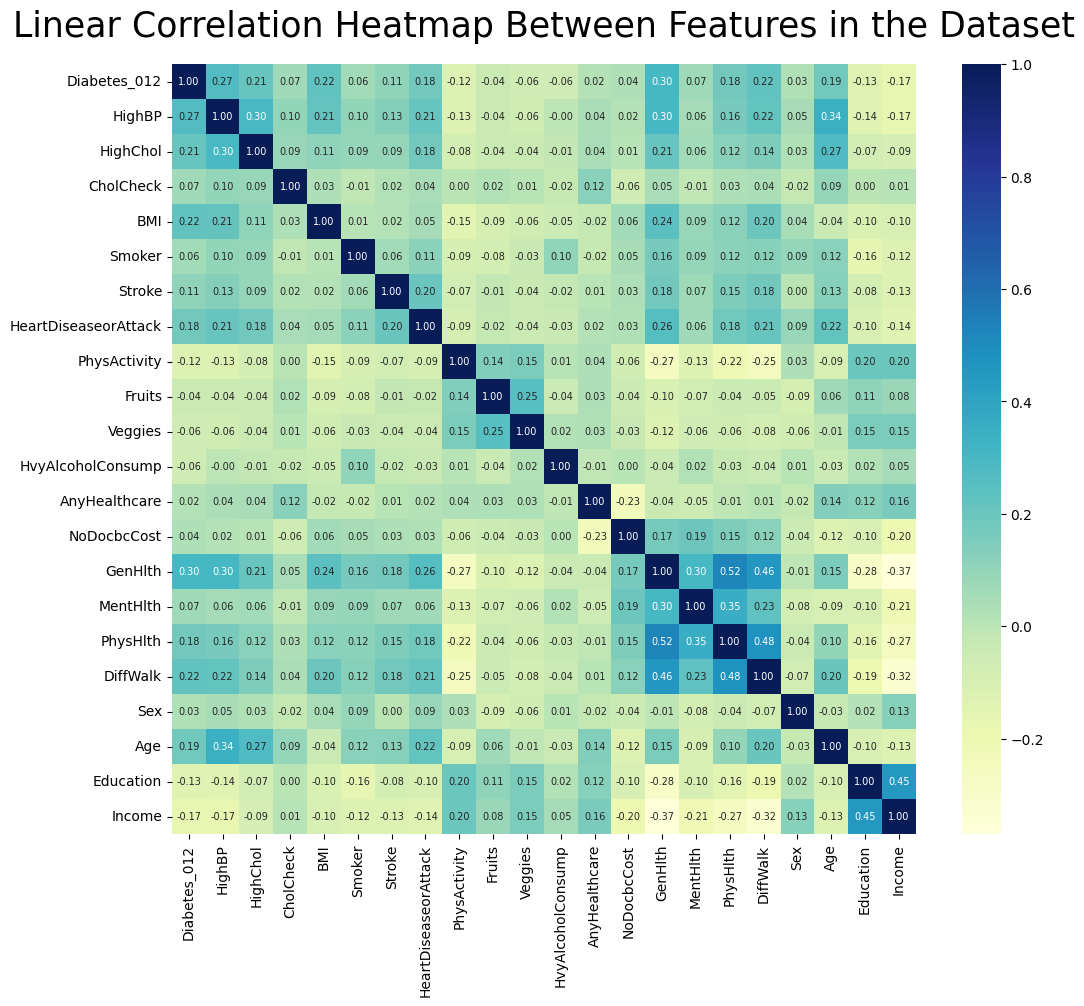

In [4]:
plt.figure(figsize=(12, 10))
ax = plt.axes()
sns.heatmap(df.corr(), ax=ax, cmap='YlGnBu', annot=True, annot_kws={"size": 7}, fmt='.2f')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
sns.set(rc={'figure.figsize': (20, 8)})
ax.set_title('Linear Correlation Heatmap Between Features in the Dataset', fontsize= 25, pad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

(array([-0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4]),
 [Text(0, -0.2, '−0.2'),
  Text(0, -0.1, '−0.1'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.10000000000000003, '0.1'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.3, '0.3'),
  Text(0, 0.4000000000000001, '0.4')])

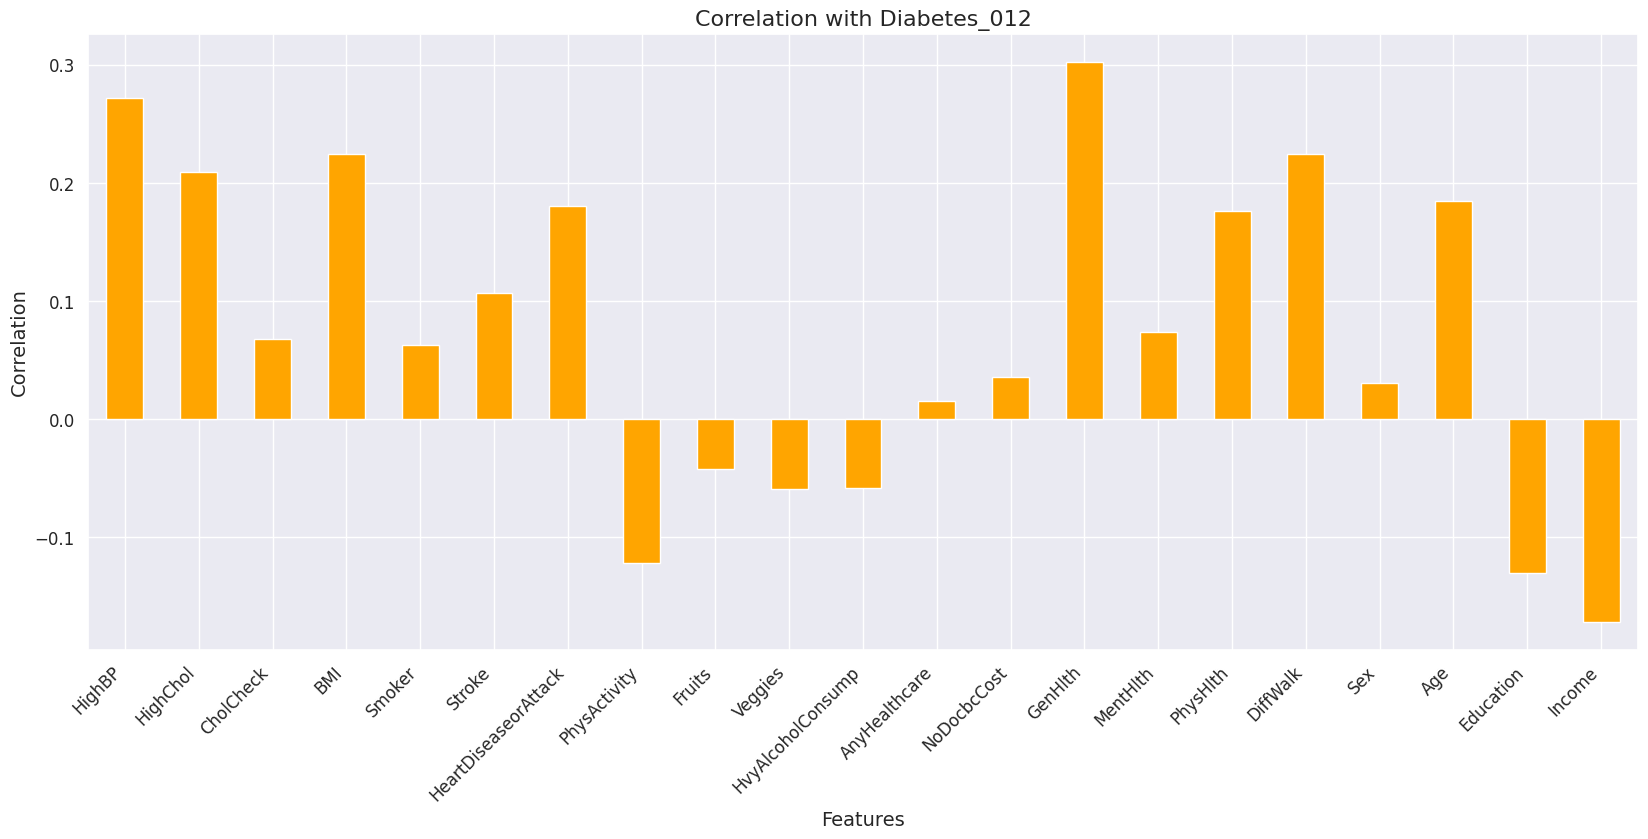

In [6]:
plt.figure(figsize=(20, 8))
df.drop('Diabetes_012', axis=1).corrwith(df.Diabetes_012).plot(kind='bar', grid=True, color="Orange")
plt.title("Correlation with Diabetes_012", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Correlation", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

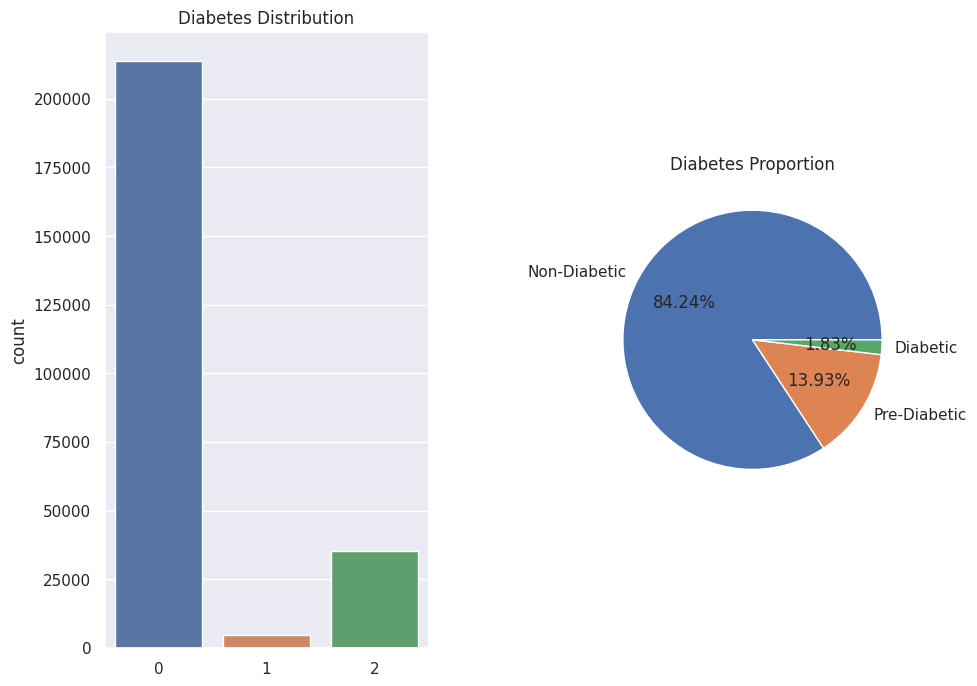

In [7]:
figure1, plot1 = plt.subplots(1, 2, figsize=(12, 8))
sns.countplot(data=df, x='Diabetes_012', ax=plot1[0])
plot1[0].set_title("Diabetes Distribution")
plot1[0].set_xlabel("")
labels = ["Non-Diabetic", "Pre-Diabetic","Diabetic"]
sizes = df["Diabetes_012"].value_counts()
plot1[1].pie(sizes, labels=labels, autopct='%.2f%%')
plot1[1].set_title("Diabetes Proportion")
figure1.subplots_adjust(wspace=0.5, right=0.8) 

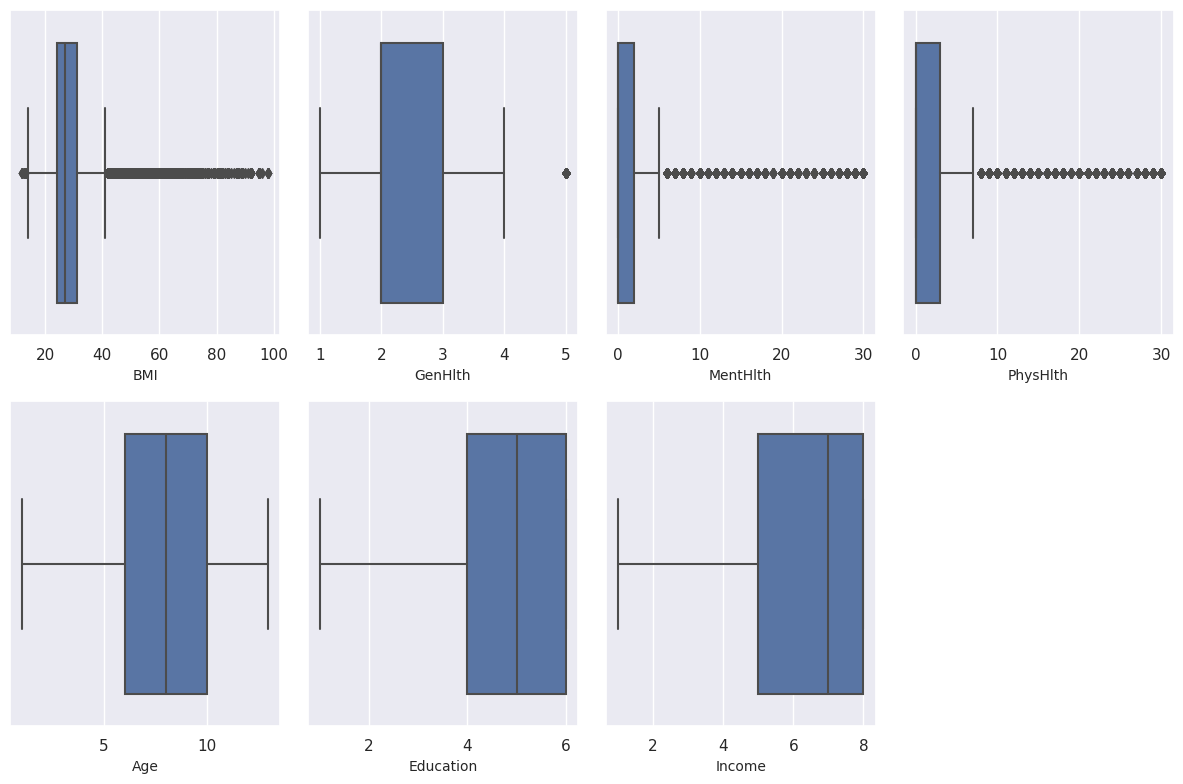

In [8]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=UserWarning)
    features = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
    fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))
    for i, feat in enumerate(features):
        row = i // 4
        col = i % 4
        sns.boxplot(x=df[feat], ax=axs[row, col], orient='v')
        axs[row, col].set_xlabel(feat, fontsize=10)
    plt.delaxes(axs[1, 3])
    plt.tight_layout()

In [9]:
from scipy.stats import zscore
z_scores_df = pd.DataFrame(zscore(df), columns=features)
print(z_scores_df.head())

z_score_means = []
for z_score in z_scores_df.columns:
    mean = z_scores_df[z_score].mean()
    z_score_means.append(mean)

z_score_means_df = pd.DataFrame({"column":z_scores_df.columns, 'mean':z_score_means})
print(z_score_means_df)

z_score_max = []
for z_score in z_scores_df.columns:
    max = z_scores_df[z_score].max()
    z_score_max.append(max)

z_score_max_df = pd.DataFrame({"column":z_scores_df.columns, 'max':z_score_max})
print(z_score_max_df)

z_score_min = []
for z_score in z_scores_df.columns:
    min = z_scores_df[z_score].min()
    z_score_min.append(min)

z_score_min_df = pd.DataFrame({"column":z_scores_df.columns, 'min':z_score_min})
print(z_score_min_df)

        BMI   GenHlth  MentHlth  PhysHlth       Age  Education    Income
0  1.757936  2.329121  1.998592  1.233999  0.316900  -1.065595 -1.474487
1 -0.511806  0.457294 -0.429630 -0.486592 -0.337933   0.963272 -2.440138
2 -0.057858  2.329121  3.617407  2.954590  0.316900  -1.065595  0.939638
3 -0.209174 -0.478619 -0.429630 -0.486592  0.971733  -2.080028 -0.026012
4 -0.663122 -0.478619 -0.024926 -0.486592  0.971733  -0.051162 -0.991662
      column          mean
0        BMI -2.505162e-16
1    GenHlth  1.711935e-16
2   MentHlth  8.963011e-18
3   PhysHlth  3.450759e-17
4        Age  6.767074e-17
5  Education -8.514861e-17
6     Income  7.170409e-17
      column        max
0        BMI  10.534271
1    GenHlth   2.329121
2   MentHlth   3.617407
3   PhysHlth   2.954590
4        Age   1.626566
5  Education   0.963272
6     Income   0.939638
      column       min
0        BMI -2.478916
1    GenHlth -1.414532
2   MentHlth -0.429630
3   PhysHlth -0.486592
4        Age -2.302431
5  Education -4.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42, shuffle=True)
continuous_features = ['BMI']
scaler = MinMaxScaler()
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])

categorical_features = ["GenHlth", "MentHlth", "PhysHlth", "Age", "Education","Income"]
X_train = pd.get_dummies(X_train, columns=categorical_features, prefix=categorical_features, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_features, prefix=categorical_features, drop_first=True)

scaled_features = X_train.columns
scaled_features_test = X_test.columns
X_train = pd.DataFrame(X_train, columns=scaled_features)
X_test = pd.DataFrame(X_test, columns=scaled_features_test)

In [ ]:
models = {'Logistic Regression': LogisticRegression(max_iter=10000), 
          'Naive Bayes': GaussianNB(), 
          'ANN': MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000),
          'KNN': KNeighborsClassifier(n_neighbors=3),
          'Decision Tree': DecisionTreeClassifier(criterion='gini',random_state=0),
          }

metrics = {'accuracy': make_scorer(accuracy_score),
           'f1': make_scorer(f1_score),
           'recall': make_scorer(recall_score),
           'precision': make_scorer(precision_score),
           'auc': make_scorer(roc_auc_score)}

train_results_cv_bench = pd.DataFrame(columns=['Model_train', 'Accuracy_train', 'F1-score_train', 'Recall_train', 'Precision_train', 'AUC_train'])
test_results_cv_bench = pd.DataFrame(columns=['Model_test', 'Accuracy_test', 'F1-score_test', 'Recall_test', 'Precision_test', 'AUC_test'])

train_results_bench = pd.DataFrame(columns=['Model_train', 'Accuracy_train', 'F1-score_train', 'Recall_train', 'Precision_train', 'AUC_train'])
test_results_bench = pd.DataFrame(columns=['Model_test', 'Accuracy_test', 'F1-score_test', 'Recall_test', 'Precision_test', 'AUC_test'])

for name, model in models.items():
    cv_results_bench = cross_validate(model, X_train, y_train, cv=5, scoring=metrics, return_estimator=True)
    print(cv_results_bench)
    
    test_results_cv_bench = test_results_cv_bench.append({'Model_test': name, 
                                        'Accuracy_test': cv_results_bench['test_accuracy'].mean(), 
                                        'F1-score_test': cv_results_bench['test_f1'].mean(), 
                                        'Recall_test': cv_results_bench['test_recall'].mean(), 
                                        'Precision_test': cv_results_bench['test_precision'].mean(), 
                                        'AUC_test': cv_results_bench['test_auc'].mean()}, ignore_index=True)

    best_f1_model_bench = np.argmax(cv_results_bench['test_f1'])
    print("Best model based on F1 score:", best_f1_model_bench)

    best_model_bench = cv_results_bench['estimator'][best_f1_model_bench]
    best_model_bench.fit(X_train, y_train)
  
    y_train_pred = best_model_bench.predict(X_train)
    y_train_proba = best_model_bench.predict_proba(X_train)
    y_test_pred = best_model_bench.predict(X_test)
    y_test_proba = best_model_bench.predict_proba(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred,average='micro')
    train_recall = recall_score(y_train, y_train_pred,average='micro')
    train_precision = precision_score(y_train, y_train_pred,average='micro')
    train_auc = roc_auc_score(y_train, y_train_proba,multi_class='ovr')
    
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred,average='micro')
    test_recall = recall_score(y_test, y_test_pred,average='micro')
    test_precision = precision_score(y_test, y_test_pred,average='micro')
    test_auc = roc_auc_score(y_test, y_test_proba,multi_class='ovr')
    
    train_results_bench = train_results_bench.append({'Model_train': name, 
                                          'Accuracy_train': train_accuracy, 
                                          'F1-score_train': train_f1, 
                                          'Recall_train': train_recall, 
                                          'Precision_train': train_precision, 
                                          'AUC_train': train_auc}, ignore_index=True)
    test_results_bench = test_results_bench.append({'Model_test': name, 
                                        'Accuracy_test': test_accuracy, 
                                        'F1-score_test': test_f1, 
                                        'Recall_test': test_recall, 
                                        'Precision_test': test_precision,
                                        'AUC_test': test_auc}, ignore_index=True)

    # confusion_matrix_plot(confusion_matrix(y_test, y_test_pred), name+' benchmark', name+' Benchmark')
print("Training Results:")
print(train_results_bench)
print("\n")
print("Test Results:")
print(test_results_bench)


{'fit_time': array([22.77187181, 21.7176559 , 22.95245957, 22.08977127, 23.00537992]), 'score_time': array([0.03368568, 0.02983117, 0.03090978, 0.03152227, 0.04037976]), 'estimator': [LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000)], 'test_accuracy': array([0.85005521, 0.85041137, 0.84927165, 0.8495156 , 0.84755663]), 'test_f1': array([nan, nan, nan, nan, nan]), 'test_recall': array([nan, nan, nan, nan, nan]), 'test_precision': array([nan, nan, nan, nan, nan]), 'test_auc': array([nan, nan, nan, nan, nan])}
Best model based on F1 score: 0
{'fit_time': array([0.28946471, 0.27519894, 0.26932979, 0.26787305, 0.26713419]), 'score_time': array([0.05888081, 0.05431247, 0.05346727, 0.05359292, 0.05138779]), 'estimator': [GaussianNB(), GaussianNB(), GaussianNB(), GaussianNB(), GaussianNB()], 'test_accuracy': array([0.09199701, 0.03721908, 0.031378  , 0.06510899, 0.0

# **Random Forest Feature Engineering on Benchmark Unsampled Dataset**

In [ ]:
selection = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),)
selection.fit(X_train, y_train)

X_train_selected = selection.transform(X_train)
X_test_selected = selection.transform(X_test)


models_rf_bench = {'Logistic Regression': LogisticRegression(max_iter=10000), 
          'Naive Bayes': GaussianNB(), 
          'ANN': MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000),
          'KNN': KNeighborsClassifier(n_neighbors=3),
          'Decision Tree': DecisionTreeClassifier(criterion='gini',random_state=0),
          }

metrics_rf_bench = {'accuracy': make_scorer(accuracy_score),
           'f1': make_scorer(f1_score),
           'recall': make_scorer(recall_score),
           'precision': make_scorer(precision_score),
           'auc': make_scorer(roc_auc_score)}

train_results_rf_bench = pd.DataFrame(columns=['Model_train_rf', 'Accuracy_train_rf', 'F1-score_train_rf', 'Recall_train_rf', 'Precision_train_rf', 'AUC_train_rf'])
test_results_rf_bench = pd.DataFrame(columns=['Model_test_rf', 'Accuracy_test_rf', 'F1-score_test_rf', 'Recall_test_rf', 'Precision_test_rf', 'AUC_test_rf'])
test_results_cv_rf_bench = pd.DataFrame(columns=['Model_test_rf', 'Accuracy_test_rf', 'F1-score_test_rf', 'Recall_test_rf', 'Precision_test_rf', 'AUC_test_rf'])

for name, model in models_rf_bench.items():
    cv_results_rf_bench = cross_validate(model, X_train, y_train, cv=5, scoring=metrics_rf_bench, return_estimator=True)
    print(cv_results_rf_bench)
    test_results_cv_rf_bench = test_results_cv_rf_bench.append({'Model_test': name, 
                                        'Accuracy_test': cv_results_rf_bench['test_accuracy'].mean(), 
                                        'F1-score_test': cv_results_rf_bench['test_f1'].mean(), 
                                        'Recall_test': cv_results_rf_bench['test_recall'].mean(), 
                                        'Precision_test': cv_results_rf_bench['test_precision'].mean(), 
                                        'AUC_test': cv_results_rf_bench['test_auc'].mean()}, ignore_index=True)

    best_f1_model_rf_bench = np.argmax(cv_results_rf_bench['test_f1'])
    print("Best model based on F1 score:", best_f1_model_rf_bench)
    best_model_rf_bench = cv_results_rf_bench['estimator'][best_f1_model_rf_bench]
    best_model_rf_bench.fit(X_train_selected, y_train)
    
    y_train_pred_rf_bench = best_model_rf_bench.predict(X_train_selected)
    y_train_proba_rf_bench = best_model_rf_bench.predict_proba(X_train_selected)
    y_test_pred_rf_bench = best_model_rf_bench.predict(X_test_selected)
    y_test_proba_rf_bench = best_model_rf_bench.predict_proba(X_test_selected)
    
    train_accuracy = accuracy_score(y_train, y_train_pred_rf_bench)
    train_f1 = f1_score(y_train, y_train_pred_rf_bench,average='micro')
    train_recall = recall_score(y_train, y_train_pred_rf_bench,average='micro')
    train_precision = precision_score(y_train, y_train_pred_rf_bench,average='micro')
    train_auc = roc_auc_score(y_train,y_train_proba_rf_bench,multi_class='ovr')
    
    test_accuracy = accuracy_score(y_test, y_test_pred_rf_bench)
    test_f1 = f1_score(y_test, y_test_pred_rf_bench,average='micro')
    test_recall = recall_score(y_test, y_test_pred_rf_bench,average='micro')
    test_precision = precision_score(y_test, y_test_pred_rf_bench,average='micro')
    test_auc = roc_auc_score(y_test,y_test_proba_rf_bench,multi_class='ovr')

    train_results_rf_bench = train_results_rf_bench.append({'Model_train_rf': name, 
                                          'Accuracy_train_rf': train_accuracy, 
                                          'F1-score_train_rf': train_f1, 
                                          'Recall_train_rf': train_recall, 
                                          'Precision_train_rf': train_precision, 
                                          'AUC_train_rf': train_auc}, ignore_index=True)
    test_results_rf_bench = test_results_rf_bench.append({'Model_test_rf': name, 
                                        'Accuracy_test_rf': test_accuracy, 
                                        'F1-score_test_rf': test_f1, 
                                        'Recall_test_rf': test_recall, 
                                        'Precision_test_rf': test_precision, 
                                        'AUC_test_rf': test_auc}, ignore_index=True)

print("Training Results:")
print(train_results_rf_bench)
print("\n")
print("Test Results:")
print(test_results_rf_bench)


{'fit_time': array([24.02118182, 26.02648425, 24.21410346, 32.92944312, 24.00101948]), 'score_time': array([0.03224635, 0.07877398, 0.03037977, 0.03655624, 0.06331635]), 'estimator': [LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000)], 'test_accuracy': array([0.85005521, 0.85041137, 0.84927165, 0.8495156 , 0.84755663]), 'test_f1': array([nan, nan, nan, nan, nan]), 'test_recall': array([nan, nan, nan, nan, nan]), 'test_precision': array([nan, nan, nan, nan, nan]), 'test_auc': array([nan, nan, nan, nan, nan])}
Best model based on F1 score: 0
{'fit_time': array([0.27377105, 0.28166723, 0.27239418, 0.27674937, 0.27939725]), 'score_time': array([0.05509233, 0.05380464, 0.05268216, 0.05402422, 0.05432487]), 'estimator': [GaussianNB(), GaussianNB(), GaussianNB(), GaussianNB(), GaussianNB()], 'test_accuracy': array([0.09199701, 0.03721908, 0.031378  , 0.06510899, 0.0

## **SMOTE Sampling**

In [ ]:
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
y_train_smote = np.ravel(y_train_smote)

models = {'Logistic Regression': LogisticRegression(max_iter=10000), 
          'Naive Bayes': GaussianNB(), 
          'ANN': MLPClassifier(hidden_layer_sizes=(16, 8), max_iter=1000),
          'KNN': KNeighborsClassifier(n_neighbors=3),
          'Decision Tree': DecisionTreeClassifier(criterion='gini',random_state=0),
          }

metrics = {'accuracy': make_scorer(accuracy_score),
           'f1': make_scorer(f1_score),
           'recall': make_scorer(recall_score),
           'precision': make_scorer(precision_score),
           'auc': make_scorer(roc_auc_score)}

train_results_smote = pd.DataFrame(columns=['Model_train_Smote', 'Accuracy_train_Smote', 'F1-score_train_Smote', 'Recall_train_Smote', 'Precision_train_Smote', 'AUC_train_Smote'])
test_results_smote = pd.DataFrame(columns=['Model_test_Smote', 'Accuracy_test_Smote', 'F1-score_test_Smote', 'Recall_test_Smote', 'Precision_test_Smote', 'AUC_test_Smote'])
test_results_cv_smote = pd.DataFrame(columns=['Model_test_Smote', 'Accuracy_test_Smote', 'F1-score_test_Smote', 'Recall_test_Smote', 'Precision_test_Smote', 'AUC_test_Smote'])

for name, model in models.items():
    cv_results_smote = cross_validate(model, X_train_smote, y_train_smote, cv=5, scoring=metrics, return_estimator=True)
    print(cv_results_smote)
    test_results_cv_smote = test_results_cv_smote.append({'Model_test': name, 
                                        'Accuracy_test': cv_results_smote['test_accuracy'].mean(), 
                                        'F1-score_test': cv_results_smote['test_f1'].mean(), 
                                        'Recall_test': cv_results_smote['test_recall'].mean(), 
                                        'Precision_test': cv_results_smote['test_precision'].mean(), 
                                        'AUC_test': cv_results_smote['test_auc'].mean()}, ignore_index=True)

    best_f1_model_smote= np.argmax(cv_results_smote['test_f1'])
    print("Best model based on F1 score:", best_f1_model_smote)

    best_model_smote = cv_results_smote['estimator'][best_f1_model_smote]
    best_model_smote.fit(X_train_smote, y_train_smote)
  
    y_train_pred_smote = best_model_smote.predict(X_train_smote)
    y_train_proba_smote = best_model_smote.predict_proba(X_train_smote)
    y_test_pred_smote = best_model_smote.predict(X_test)
    y_test_proba_smote = best_model_smote.predict_proba(X_test)
  
    train_accuracy = accuracy_score(y_train_smote, y_train_pred_smote)
    train_f1 = f1_score(y_train_smote, y_train_pred_smote,average='micro')
    train_recall = recall_score(y_train_smote, y_train_pred_smote,average='micro')
    train_precision = precision_score(y_train_smote, y_train_pred_smote,average='micro')
    train_auc = roc_auc_score(y_train_smote, y_train_proba_smote,multi_class='ovr')
    
    test_accuracy = accuracy_score(y_test, y_test_pred_smote)
    test_f1 = f1_score(y_test, y_test_pred_smote,average='micro')
    test_recall = recall_score(y_test, y_test_pred_smote,average='micro')
    test_precision = precision_score(y_test, y_test_pred_smote,average='micro')
    test_auc = roc_auc_score(y_test, y_test_proba_smote,multi_class='ovr')
    
    train_results_smote = train_results_smote.append({'Model_train_Smote': name, 
                                          'Accuracy_train_Smote': train_accuracy, 
                                          'F1-score_train_Smote': train_f1, 
                                          'Recall_train_Smote': train_recall, 
                                          'Precision_train_Smote': train_precision, 
                                          'AUC_train_Smote': train_auc}, ignore_index=True)
    test_results_smote = test_results_smote.append({'Model_test_Smote': name, 
                                        'Accuracy_test_Smote': test_accuracy, 
                                        'F1-score_test_Smote': test_f1, 
                                        'Recall_test_Smote': test_recall, 
                                        'Precision_test_Smote': test_precision, 
                                        'AUC_test_Smote': test_auc}, ignore_index=True)

print("Training Results:")
print(train_results_smote)
print("\n")
print("Test Results:")
print(test_results_smote)

{'fit_time': array([107.1408639 ,  90.97115922,  93.6825583 ,  92.2711761 ,
        96.37583995]), 'score_time': array([0.08535552, 0.08580828, 0.08899283, 0.16176724, 0.08262944]), 'estimator': [LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000), LogisticRegression(max_iter=10000)], 'test_accuracy': array([0.59522738, 0.65824814, 0.66276208, 0.66038558, 0.66001997]), 'test_f1': array([nan, nan, nan, nan, nan]), 'test_recall': array([nan, nan, nan, nan, nan]), 'test_precision': array([nan, nan, nan, nan, nan]), 'test_auc': array([nan, nan, nan, nan, nan])}
Best model based on F1 score: 0
{'fit_time': array([0.67682052, 0.67528391, 0.68690848, 0.75065351, 0.90892458]), 'score_time': array([0.17704248, 0.17112017, 0.1760087 , 0.21689057, 0.20623231]), 'estimator': [GaussianNB(), GaussianNB(), GaussianNB(), GaussianNB(), GaussianNB()], 'test_accuracy': array([0.38086734, 0.41732173, 0.41713892, 0.4